## Usecase investigation

When I receive a task, I like to discuss the assignment with the stakeholders - people who are going to give the requirements and provide the necessary details or are fully responsible for the result or are affected by my output down the pipeline.

Since some organizational issues impede me from completing this - time limitations, middle man in the communication chain - I am going to provide some of the questions I would have asked during the aforementioned discussion and my assumptions of how the answers may look like. The assumptions then heavily affect the definition of the problem and the respective solution.


<a id='assumptions'></a>
### Assumptions
1. The target is automatization of assigning priorities to the incidents. A related goal is minimizing the number of reassignings an incident goes through.  
2. The actions of the IT team during assignment are not always correct (the best possible sequence of actions was not achieved). 
3. After some investigation I learned, that the priority can change during the incident lifetime (happens rarely, but did occur in 284 cases).
4. The document provided the number of unique values 24918, however I have found only 24569. I assume this to be a mistake on the document's author's side. 
5. I have found out that ID_caller is not necessarily unique for an incident (it is different in 3 cases). I do not know the story behind it, therefore I do not treat it as an anomaly. However, how is it possible? 
6. An example environment that generated the data set is considered to be the following: ID_caller is the final customer of the system who calls to the call center and complains to 'opened_by' worker. 'opened_by' worker receives the complaint, write it down on paper and then brings the paper to the "service desk" to the 'Created_by' worker who logs the information into the system by creating the incident ticket.  
7. There are 284 incidents that change the impact during their lifetime. I assume that the correct impact is always at the end of the incident's life. 


<a id='open_questions'></a>

### Open questions
1. What does an update actually mean? Comments in the systems? For example 'INC0006078' contains two data entries that are completely the same, however the number of updates jumped from 1 to 2. 
2. I have found out that ID_caller is not necessarily unique for an incident (it is different in 3 cases). I do not know the story behind it, therefore I do not treat it as an anomaly. However, how is it possible? What does cause the change of ID_caller, location, etc. Should not such things be set permanent to the time the ticket is opened? 
3. What is the difference between status 'New' and 'Active'? How can there be multiple updates with status 'New'? Should it have been treated as anomalies? 
4. What do '?' mean exactly? Are they placeholders for missing data? Is it a tip for me that the values need to be interpolated?
5. ID 'INC0006078' with row number 27004 and 27005 seem to be completely different - different ID_caller, different location, different category_ID, however it is still a part of the same incident. Is this an anomaly? Is there a story behind such a change?


## Part 1

In [211]:
%load_ext autoreload
%autoreload 2
!jupyter nbextension enable --py widgetsnbextension

In [93]:
import os

import matplotlib.pyplot as plt
import pandas as pd


In [15]:
pd.set_option('display.max_columns', None)

In [17]:
data_folder = 'data'
filename = 'data.csv'
df = pd.read_csv(os.path.join(data_folder, filename), index_col=0)

In [18]:
df

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
1,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 21,29-02-2016 01:23,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
3,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 804,29-02-2016 11:29,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
4,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 908,05-03-2016 12:00,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
6,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 21,29-02-2016 05:30,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
7,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 21,29-02-2016 05:33,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Resolved,True,1,0,3,Caller 116,Opened by 12,16-02-2017 09:09,?,?,Updated by 27,16-02-2017 09:53,Email,Location 204,Category 42,Symptom 494,Group 31,Resolver 10,False,True,2 - Medium,Do Not Notify,?,?
141708,INC0120835,Closed,False,1,0,4,Caller 116,Opened by 12,16-02-2017 09:09,?,?,Updated by 27,16-02-2017 09:53,Email,Location 204,Category 42,Symptom 494,Group 31,Resolver 10,False,True,2 - Medium,Do Not Notify,?,?
141709,INC0121064,Active,True,0,0,0,Caller 116,Opened by 12,16-02-2017 14:17,?,?,Updated by 908,16-02-2017 14:17,Email,Location 204,Category 42,Symptom 494,Group 70,Resolver 10,False,False,2 - Medium,Do Not Notify,?,?
141710,INC0121064,Active,True,1,0,1,Caller 116,Opened by 12,16-02-2017 14:17,?,?,Updated by 60,16-02-2017 15:20,Email,Location 204,Category 42,Symptom 494,Group 31,?,False,False,2 - Medium,Do Not Notify,?,?


### The following part tries to understand and explore the data. The insights from it are mostly incorporated into the [Assumptions](#assumptions), [Open Questions](#open_questions) or the solutions.

You can safely jump into the [next section](#outliers).

In [100]:
df[df['change_request'] != '?']['change_request'].unique()

array(['CHG0000404', 'CHG0000647', 'CHG0000127', 'CHG0000646',
       'CHG0000507', 'CHG0001863', 'CHG0000084', 'CHG0001271',
       'CHG0000132', 'CHG0000047', 'CHG0000405', 'CHG0001019',
       'CHG0000336', 'CHG0000089', 'CHG0000536', 'CHG0000097',
       'CHG0000433', 'CHG0000402', 'CHG0000558', 'CHG0000232',
       'CHG0001829', 'CHG0001301', 'CHG0003167', 'CHG0000428',
       'CHG0000707', 'CHG0003447', 'CHG0000914', 'CHG0000704',
       'CHG0000293', 'CHG0001656', 'CHG0000535', 'CHG0000461',
       'CHG0000177', 'CHG0000149', 'CHG0000772', 'CHG0000179',
       'CHG0000705', 'CHG0000213', 'CHG0000207', 'CHG0000209',
       'CHG0000561', 'CHG0000775', 'CHG0000323', 'CHG0000332',
       'CHG0000363', 'CHG0001056', 'CHG0000553', 'CHG0000230',
       'CHG0000918', 'CHG0000925', 'CHG0000434', 'CHG0000622',
       'CHG0001864', 'CHG0000771', 'CHG0000357', 'CHG0002096',
       'CHG0000359', 'CHG0000406', 'CHG0000342', 'CHG0000893',
       'CHG0000697', 'CHG0000355', 'CHG0003305', 'CHG00

In [34]:
len(df['ID'].unique())

24569

In [42]:
# incidents with changing impact
d = df.groupby(['ID'])
a = d['impact'].nunique() > 1
a[a]

ID
INC0000062    True
INC0000161    True
INC0000171    True
INC0000341    True
INC0000388    True
              ... 
INC0104905    True
INC0108640    True
INC0111993    True
INC0114499    True
INC0118633    True
Name: impact, Length: 284, dtype: bool

In [51]:
i = a[a].index.tolist()

In [57]:
df[df['ID'].isin(i)]

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
25,INC0000062,New,True,0,0,0,Caller 3765,Opened by 180,29-02-2016 06:58,Created by 81,29-02-2016 07:26,Updated by 340,29-02-2016 07:26,Phone,Location 93,Category 53,Symptom 232,Group 70,?,True,False,2 - Medium,Do Not Notify,?,?
26,INC0000062,New,True,0,0,1,Caller 3765,Opened by 180,29-02-2016 06:58,Created by 81,29-02-2016 07:26,Updated by 340,29-02-2016 07:29,Phone,Location 93,Category 53,Symptom 232,Group 70,?,True,False,1 - High,Do Not Notify,?,?
27,INC0000062,New,True,1,0,2,Caller 3765,Opened by 180,29-02-2016 06:58,Created by 81,29-02-2016 07:26,Updated by 340,29-02-2016 07:34,Phone,Location 93,Category 53,Symptom 232,Group 23,?,True,False,1 - High,Do Not Notify,?,?
29,INC0000062,New,True,1,0,4,Caller 3765,Opened by 180,29-02-2016 06:58,Created by 81,29-02-2016 07:26,Updated by 804,29-02-2016 11:28,Phone,Location 93,Category 53,Symptom 232,Group 23,?,True,False,1 - High,Do Not Notify,?,?
30,INC0000062,New,True,1,0,5,Caller 3765,Opened by 180,29-02-2016 06:58,Created by 81,29-02-2016 07:26,Updated by 241,29-02-2016 15:51,Phone,Location 93,Category 53,Symptom 232,Group 23,?,True,False,1 - High,Do Not Notify,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141636,INC0118633,New,True,0,0,3,Caller 2552,Opened by 221,09-02-2017 18:39,?,?,Updated by 429,09-02-2017 18:52,Phone,Location 40,Category 45,Symptom 147,Group 22,?,False,False,1 - High,Do Not Notify,?,?
141637,INC0118633,New,True,0,0,4,Caller 2552,Opened by 221,09-02-2017 18:39,?,?,Updated by 475,09-02-2017 19:03,Phone,Location 40,Category 45,Symptom 147,Group 22,?,False,False,1 - High,Do Not Notify,?,?
141638,INC0118633,New,True,0,0,5,Caller 2552,Opened by 221,09-02-2017 18:39,?,?,Updated by 429,09-02-2017 20:02,Phone,Location 40,Category 45,Symptom 147,Group 22,?,False,False,1 - High,Do Not Notify,?,?
141640,INC0118633,Resolved,True,0,0,7,Caller 2552,Opened by 221,09-02-2017 18:39,?,?,Updated by 195,10-02-2017 09:26,Phone,Location 40,Category 45,Symptom 147,Group 22,Resolver 52,False,True,1 - High,Do Not Notify,Problem ID 259,?


In [58]:
df[df['ID'] == 'INC0000062']

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
25,INC0000062,New,True,0,0,0,Caller 3765,Opened by 180,29-02-2016 06:58,Created by 81,29-02-2016 07:26,Updated by 340,29-02-2016 07:26,Phone,Location 93,Category 53,Symptom 232,Group 70,?,True,False,2 - Medium,Do Not Notify,?,?
26,INC0000062,New,True,0,0,1,Caller 3765,Opened by 180,29-02-2016 06:58,Created by 81,29-02-2016 07:26,Updated by 340,29-02-2016 07:29,Phone,Location 93,Category 53,Symptom 232,Group 70,?,True,False,1 - High,Do Not Notify,?,?
27,INC0000062,New,True,1,0,2,Caller 3765,Opened by 180,29-02-2016 06:58,Created by 81,29-02-2016 07:26,Updated by 340,29-02-2016 07:34,Phone,Location 93,Category 53,Symptom 232,Group 23,?,True,False,1 - High,Do Not Notify,?,?
29,INC0000062,New,True,1,0,4,Caller 3765,Opened by 180,29-02-2016 06:58,Created by 81,29-02-2016 07:26,Updated by 804,29-02-2016 11:28,Phone,Location 93,Category 53,Symptom 232,Group 23,?,True,False,1 - High,Do Not Notify,?,?
30,INC0000062,New,True,1,0,5,Caller 3765,Opened by 180,29-02-2016 06:58,Created by 81,29-02-2016 07:26,Updated by 241,29-02-2016 15:51,Phone,Location 93,Category 53,Symptom 232,Group 23,?,True,False,1 - High,Do Not Notify,?,?
32,INC0000062,Closed,False,1,0,7,Caller 3765,Opened by 180,29-02-2016 06:58,Created by 81,29-02-2016 07:26,Updated by 908,05-03-2016 16:00,Phone,Location 93,Category 53,Symptom 232,Group 23,?,True,False,1 - High,Do Not Notify,?,?


In [38]:
df[df['count_reassign'] >=1]

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
6,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 21,29-02-2016 05:30,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
7,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 21,29-02-2016 05:33,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
9,INC0000047,Active,True,1,0,4,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 703,29-02-2016 11:32,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
10,INC0000047,Active,True,1,0,5,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 332,01-03-2016 09:14,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
11,INC0000047,Awaiting User Info,True,1,0,6,Caller 2403,Opened by 397,29-02-2016 04:40,Created by 171,29-02-2016 04:57,Updated by 332,01-03-2016 09:14,Phone,Location 165,Category 40,Symptom 471,Group 24,Resolver 89,True,False,2 - Medium,Do Not Notify,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141706,INC0120835,Active,True,1,0,1,Caller 116,Opened by 12,16-02-2017 09:09,?,?,Updated by 27,16-02-2017 09:11,Email,Location 204,Category 42,Symptom 494,Group 31,Resolver 10,False,False,2 - Medium,Do Not Notify,?,?
141707,INC0120835,Resolved,True,1,0,3,Caller 116,Opened by 12,16-02-2017 09:09,?,?,Updated by 27,16-02-2017 09:53,Email,Location 204,Category 42,Symptom 494,Group 31,Resolver 10,False,True,2 - Medium,Do Not Notify,?,?
141708,INC0120835,Closed,False,1,0,4,Caller 116,Opened by 12,16-02-2017 09:09,?,?,Updated by 27,16-02-2017 09:53,Email,Location 204,Category 42,Symptom 494,Group 31,Resolver 10,False,True,2 - Medium,Do Not Notify,?,?
141710,INC0121064,Active,True,1,0,1,Caller 116,Opened by 12,16-02-2017 14:17,?,?,Updated by 60,16-02-2017 15:20,Email,Location 204,Category 42,Symptom 494,Group 31,?,False,False,2 - Medium,Do Not Notify,?,?


In [80]:
df[df['ID'] == 'INC0006078']

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
27004,INC0006078,New,True,0,0,0,Caller 3216,Opened by 59,11-03-2016 14:29,?,?,Updated by 908,11-03-2016 14:29,Phone,Location 161,Category 26,Symptom 491,Group 70,?,False,False,2 - Medium,Do Not Notify,?,?
27005,INC0006078,New,True,1,0,1,Caller 1325,Opened by 59,11-03-2016 14:29,?,?,Updated by 135,11-03-2016 14:40,Phone,Location 42,Category 61,Symptom 491,?,?,False,False,2 - Medium,Do Not Notify,?,?
27006,INC0006078,New,True,1,0,2,Caller 1325,Opened by 59,11-03-2016 14:29,?,?,Updated by 135,11-03-2016 14:41,Phone,Location 42,Category 61,Symptom 491,?,?,False,False,2 - Medium,Do Not Notify,?,?
27008,INC0006078,Active,True,2,0,7,Caller 1325,Opened by 59,11-03-2016 14:29,?,?,Updated by 859,22-03-2016 11:23,Phone,Location 42,Category 61,Symptom 491,Group 73,?,False,False,2 - Medium,Do Not Notify,?,?


 <a id='outliers'></a>


#### How many are there requests by users? Are there outliers? Are there outliers in locations?

In [76]:
# Multiple ID_caller per ID
a = df.groupby(['ID'])['ID_caller'].nunique() > 1
a[a]

ID
INC0005103    True
INC0005211    True
INC0006078    True
Name: ID_caller, dtype: bool

In [514]:
# counting IDs by each opened_by
opened = df.groupby(['ID']).first().groupby('opened_by')['ID_status'].count().sort_values()
opened

opened_by
Opened by  429       1
Opened by  80        1
Opened by  448       1
Opened by  447       1
Opened by  440       1
                  ... 
Opened by  108    1018
Opened by  55     1028
Opened by  131    1223
Opened by  24     1581
Opened by  17     7118
Name: ID_status, Length: 208, dtype: int64

<AxesSubplot: title={'center': 'Number of incidents opened by each user'}, xlabel='opened_by'>

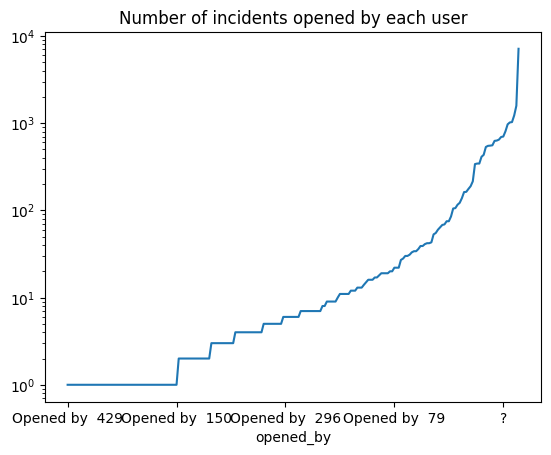

In [517]:
opened.plot(logy=True, title='Number of incidents opened by each user')

We can observe that the data is not evenly distributed. Some of the workers take a lot the calls (assuming they are the middlemen). 'Opened_by 17' should definitely be employee of the season.

<AxesSubplot: title={'center': 'Number of incidents reported by the user'}, xlabel='ID_caller'>

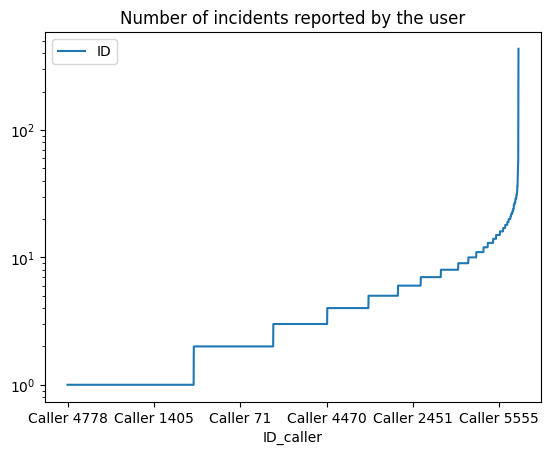

In [518]:
id_caller = df.groupby(['ID','ID_caller']).first().index.to_frame().reset_index(drop=True)
caller_count = id_caller.groupby(['ID_caller']).count().sort_values(by='ID')
caller_count.plot(logy=True, title='Number of incidents reported by the user')

In [117]:
id_location = df.groupby(['ID','location']).first().index.to_frame().reset_index(drop=True)
location_count = id_location.groupby(['location']).count().sort_values(by='ID')
location_count

,ID
location,
Location 183,1
Location 68,1
Location 203,1
Location 202,1
Location 194,1
...,...
Location 93,1912
Location 108,2124
Location 143,3227


<AxesSubplot: title={'center': 'Number of incidents by location'}, xlabel='location'>

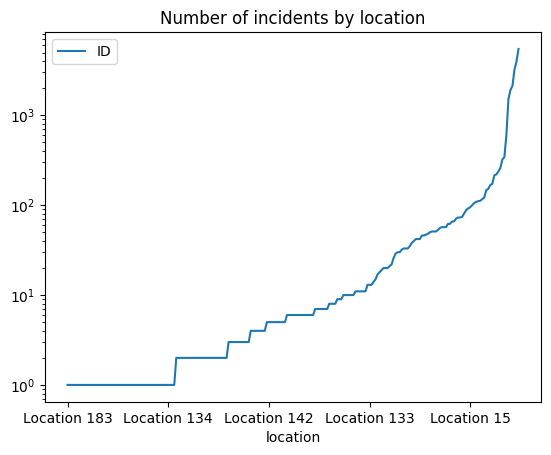

In [519]:
location_count.plot(logy=True, title='Number of incidents by location')

In [521]:
location_count.tail(10)

,ID
location,
Location 111,260
Location 43,324
Location 179,342
Location 188,606
Location 51,1504
Location 93,1912
Location 108,2124
Location 143,3227
Location 161,3956


In [125]:
len(df['location'].unique())

225

6 out of 225 locations operate in thousands of complaints. Maybe there are some serious malfunctions in the location and investment of some more time and money of the workforce can be beneficial and save money in IT operations costs.

3 out of 5223 ID_callers operate in hundreds of complaints, while the rest report tens. Maybe some of these complaints are caused by faulty equipment that needs to be exchanged. Or maybe these workers need to receive more training on handling the equipment.  

### How to treat dataset
Since the data entries are not iid, I cannot treat them as such. I need to simplify the data first. The simplification depends heavily on the use case. I will start by treating each use case individually and then later will (maybe?) try to create a model that will cope with multiple usecases.

#### Importance
The incidents can be treated as iid. A simplified use case of impact can be defined as: a system receives an incident [first row with 'ID_status' = 'New']; what is the expected impact [the impact of the same incident with 'ID_status' = 'Closed']. This use case does not take into consideration a scenario in which the change of the impact value can be valid in all steps and not a part of the mistakes by the IT, thus all the changes of the importance during the life of the incident are the results of the incorrect prioritization.

The proposed solution is a containerized algorithm that can suggest impact based on the ID_caller, location type_contact, category_ID, user_symptom.

##### The First Model

###### Dataset

The relevant columns of the dataset are all categorical as well as the target variable. The dataset is also highly imbalanced (most of the tickets are of medium impact (95.4%), while other classes of interest are almost non present - high impact (2%) and low impact (2.5%)). These facts drove my decision to use CatBoost that works well with categorical variables and is able to balance the dataset. Since the dataset is imbalanced 'balanced_accuracy_score' is used as a metric.

In [147]:
# making sure that the ID_status in the dataset contains both New and Closed: 
# filter all New, group by the ID, select first, 
# do the same for the Closed, 
# do inner join on both

new = df[df['ID_status'] == 'New'].groupby(['ID']).first()
closed = df[df['ID_status'] == 'Closed'].groupby(['ID']).first()
d = new.merge(closed, on='ID')

,ID_status_x,active_x,count_reassign_x,count_opening_x,count_updated_x,ID_caller_x,opened_by_x,opened_time_x,Created_by_x,created_at_x,updated_by_x,updated_at_x,type_contact_x,location_x,category_ID_x,user_symptom_x,Support_group_x,support_incharge_x,Doc_knowledge_x,confirmation_check_x,impact_x,notify_x,problem_ID_x,change_request_x,ID_status_y,active_y,count_reassign_y,count_opening_y,count_updated_y,ID_caller_y,opened_by_y,opened_time_y,Created_by_y,created_at_y,updated_by_y,updated_at_y,type_contact_y,location_y,category_ID_y,user_symptom_y,Support_group_y,support_incharge_y,Doc_knowledge_y,confirmation_check_y,impact_y,notify_y,problem_ID_y,change_request_y
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 21,29-02-2016 01:23,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 908,05-03-2016 12:00,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
INC0000057,New,True,0,0,0,Caller 4416,Opened by 8,29-02-2016 06:10,?,?,Updated by 21,29-02-2016 06:26,Phone,Location 204,Category 20,Symptom 471,Group 70,?,True,False,2 - Medium,Do Not Notify,?,?,Closed,False,0,0,6,Caller 4416,Opened by 8,29-02-2016 06:10,?,?,Updated by 908,06-03-2016 03:00,Phone,Location 204,Category 20,Symptom 471,Group 70,Resolver 6,True,False,2 - Medium,Do Not Notify,Problem ID 2,?
INC0000060,New,True,0,0,0,Caller 4491,Opened by 180,29-02-2016 06:38,Created by 81,29-02-2016 06:42,Updated by 340,29-02-2016 06:42,Phone,Location 204,Category 9,Symptom 450,Group 25,Resolver 125,True,False,2 - Medium,Do Not Notify,?,?,Closed,False,0,0,3,Caller 4491,Opened by 180,29-02-2016 06:38,Created by 81,29-02-2016 06:42,Updated by 908,07-03-2016 13:00,Phone,Location 204,Category 9,Symptom 450,Group 25,Resolver 125,True,False,2 - Medium,Do Not Notify,?,?
INC0000062,New,True,0,0,0,Caller 3765,Opened by 180,29-02-2016 06:58,Created by 81,29-02-2016 07:26,Updated by 340,29-02-2016 07:26,Phone,Location 93,Category 53,Symptom 232,Group 70,?,True,False,2 - Medium,Do Not Notify,?,?,Closed,False,1,0,7,Caller 3765,Opened by 180,29-02-2016 06:58,Created by 81,29-02-2016 07:26,Updated by 908,05-03-2016 16:00,Phone,Location 93,Category 53,Symptom 232,Group 23,?,True,False,1 - High,Do Not Notify,?,?
INC0000063,New,True,0,0,0,Caller 2146,Opened by 180,29-02-2016 07:08,Created by 81,29-02-2016 07:17,Updated by 340,29-02-2016 07:17,Phone,Location 93,Category 20,Symptom 471,Group 70,?,True,False,2 - Medium,Do Not Notify,?,?,Closed,False,1,0,7,Caller 2146,Opened by 180,29-02-2016 07:08,Created by 81,29-02-2016 07:17,Updated by 908,05-03-2016 17:00,Phone,Location 93,Category 20,Symptom 471,Group 23,?,True,False,2 - Medium,Do Not Notify,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INC0119241,New,True,0,0,0,Caller 1384,Opened by 508,13-02-2017 06:45,?,?,Updated by 908,13-02-2017 06:45,IVR,Location 246,Category 50,Symptom 533,Group 70,?,False,False,3 - Low,Do Not Notify,?,?,Closed,False,0,0,1,Caller 1384,Opened by 508,13-02-2017 06:45,?,?,Updated by 931,13-02-2017 06:45,IVR,Location 246,Category 50,Symptom 533,Group 70,?,False,False,3 - Low,Do Not Notify,?,?
INC0119390,New,True,0,0,0,Caller 5100,Opened by 490,13-02-2017 10:33,?,?,Updated by 908,13-02-2017 10:33,Self service,Location 217,?,?,Group 70,?,False,False,2 - Medium,Do Not Notify,?,?,Closed,False,3,0,6,Caller 5100,Opened by 490,13-02-2017 10:33,?,?,Updated by 907,14-02-2017 12:08,Self service,Location 217,Category 45,?,Group 39,Resolver 36,False,True,2 - Medium,Do Not Notify,?,?
INC0119987,New,True,0,0,0,Caller 831,Opened by 508,14-02-2017 11:15,?,?,Updated by 908,14-02-2017 11:15,IVR,Location 246,C

In [137]:
len(d)

9572

In [444]:
d.groupby('impact_y').count()['active_x']*100/len(d)

impact_y
1 - High       1.984956
2 - Medium    95.476389
3 - Low        2.538654
Name: active_x, dtype: float64

In [416]:
X_cols = ['ID_caller_x', 'type_contact_x', 'location_x', 'category_ID_x', 'user_symptom_x'] # 'opened_by_x', 'created_by_x', 'updated_by_x'
Y_cols = ['impact_y']
X = d[X_cols].reset_index(drop=True)
y = d[Y_cols].reset_index(drop=True)

In [417]:
le = LabelEncoder()
y = le.fit_transform(y.values.ravel())

In [419]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [423]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import balanced_accuracy_score


model = CatBoostClassifier(
    custom_loss=[metrics.F1()],
    random_seed=42,
    logging_level='Silent',
    border_count=None,
#     auto_class_weights='Balanced'
#     class_weights={'1 - High' : 7, '2 - Medium': 0.05, '3 - Low':4}
    class_weights=[15, 0.01, 5]
)

categorical_mask= list(range(0, X.shape[1]))


model.fit(
    X_train, y_train,
    cat_features=categorical_mask,
#     logging_level='Verbose',  # you can uncomment this for text output
    
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [386]:
model.score(X_test, y_test)  # F1 score

0.5436690346844965

In [424]:
y_preds = model.predict(X_test)

In [425]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_preds)

0.5281758216322648

In [429]:
class_names = {'1 - High':0, '2 - Medium':1, '3 - Low':2}

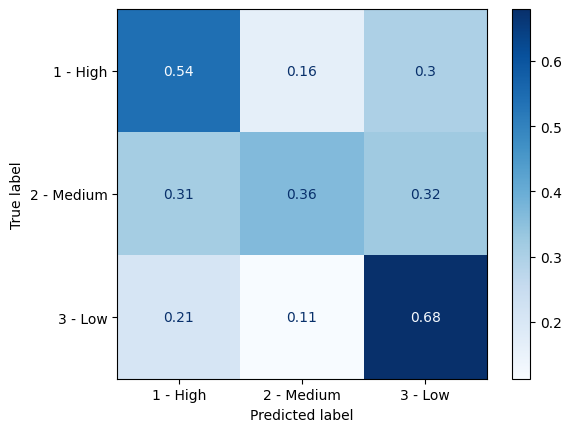

In [431]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize='true',
    )

The balanced accuracy is 52% which not very high. But that is not even the main problem. 
In the confusion matrix we can see that 30% of the incidents with high impact are actually are classified as low impact. That is not good. I can try another model to sway the distribution to prioritize the high impact incidents more.

##### The Second Model

In this part I try a library **imblearn** that can tackle the main problem of the dataset - imbalance. After multiple tries, BalancedRandomForestClassifier showed good results.  

In [432]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.cat_boost import CatBoostEncoder
# le = LabelEncoder()
# y = le.fit_transform(y.values.ravel())

cbe_x = []
for i in X_cols:
    cbe = CatBoostEncoder()
    X[i] = cbe.fit_transform(X[i], y)
    cbe_x.append(cbe)


In [433]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [434]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=1000, random_state=0)
brf.fit(X_train, y_train) 

y_pred = brf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)  

0.543839786828833

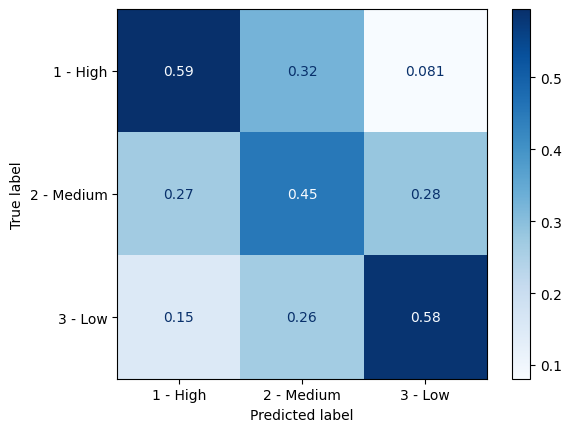

In [437]:
disp = ConfusionMatrixDisplay.from_estimator(
        brf,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize='true',
    )

The balanced accuracy is 54% percent, this is a little better than the last one. But the main contribution is the fact 59% of the high impact incidents are predicted correctly, while only ~8% of the high impact incidents fall incorrectly into the low inpact category. This is much better. There is still a lot of room for improvement, however it is already a result that can benefit the IT team. 

The worst 'false alarm' predictions (low impact incidents that got classified as high impact ones) also improved. Now there are only 15%, which is, again, a quite high number, but tolerable. 

I could also try balancing the dataset with **SMOTE**. However, it will come in further iterations. 

#### Support Group

The next problem that might be helped by the ML is predicting the support group which is in charge of the incident.

The assumption is similar to the previous use case - there only one true support group that should be assigned from the creation of the incident and that is the one that was in charge when the incident was closed. To further simplify the problem a little bit only support groups that have treated more than 15 incidents are considered. '?' support groups are ignored.

<AxesSubplot: title={'center': 'Distribution of incidents by Support Group'}, xlabel='Support_group_y'>

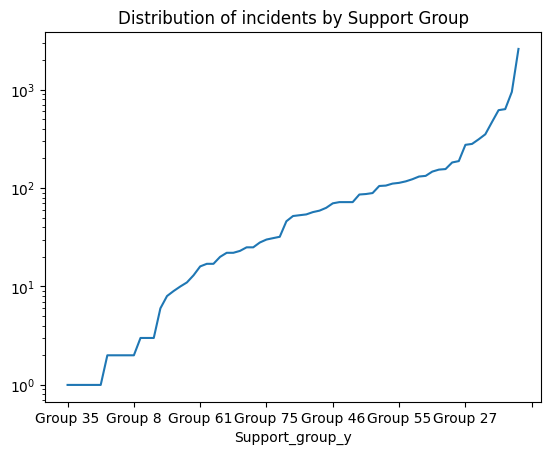

In [522]:
d.groupby('Support_group_y').count()['active_x'].sort_values().plot(logy=True, title='Distribution of incidents by Support Group')

In [495]:
a = d.groupby('Support_group_y').count()
a = a[a['active_x']>15]

In [496]:
sg_d = d[d['Support_group_y'] != '?']
sg_d = sg_d[sg_d['Support_group_y'].isin(a.index)]

In [482]:
sg_d

,ID_status_x,active_x,count_reassign_x,count_opening_x,count_updated_x,ID_caller_x,opened_by_x,opened_time_x,Created_by_x,created_at_x,updated_by_x,updated_at_x,type_contact_x,location_x,category_ID_x,user_symptom_x,Support_group_x,support_incharge_x,Doc_knowledge_x,confirmation_check_x,impact_x,notify_x,problem_ID_x,change_request_x,ID_status_y,active_y,count_reassign_y,count_opening_y,count_updated_y,ID_caller_y,opened_by_y,opened_time_y,Created_by_y,created_at_y,updated_by_y,updated_at_y,type_contact_y,location_y,category_ID_y,user_symptom_y,Support_group_y,support_incharge_y,Doc_knowledge_y,confirmation_check_y,impact_y,notify_y,problem_ID_y,change_request_y
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 21,29-02-2016 01:23,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,Created by 6,29-02-2016 01:23,Updated by 908,05-03-2016 12:00,Phone,Location 143,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
INC0000057,New,True,0,0,0,Caller 4416,Opened by 8,29-02-2016 06:10,?,?,Updated by 21,29-02-2016 06:26,Phone,Location 204,Category 20,Symptom 471,Group 70,?,True,False,2 - Medium,Do Not Notify,?,?,Closed,False,0,0,6,Caller 4416,Opened by 8,29-02-2016 06:10,?,?,Updated by 908,06-03-2016 03:00,Phone,Location 204,Category 20,Symptom 471,Group 70,Resolver 6,True,False,2 - Medium,Do Not Notify,Problem ID 2,?
INC0000060,New,True,0,0,0,Caller 4491,Opened by 180,29-02-2016 06:38,Created by 81,29-02-2016 06:42,Updated by 340,29-02-2016 06:42,Phone,Location 204,Category 9,Symptom 450,Group 25,Resolver 125,True,False,2 - Medium,Do Not Notify,?,?,Closed,False,0,0,3,Caller 4491,Opened by 180,29-02-2016 06:38,Created by 81,29-02-2016 06:42,Updated by 908,07-03-2016 13:00,Phone,Location 204,Category 9,Symptom 450,Group 25,Resolver 125,True,False,2 - Medium,Do Not Notify,?,?
INC0000062,New,True,0,0,0,Caller 3765,Opened by 180,29-02-2016 06:58,Created by 81,29-02-2016 07:26,Updated by 340,29-02-2016 07:26,Phone,Location 93,Category 53,Symptom 232,Group 70,?,True,False,2 - Medium,Do Not Notify,?,?,Closed,False,1,0,7,Caller 3765,Opened by 180,29-02-2016 06:58,Created by 81,29-02-2016 07:26,Updated by 908,05-03-2016 16:00,Phone,Location 93,Category 53,Symptom 232,Group 23,?,True,False,1 - High,Do Not Notify,?,?
INC0000063,New,True,0,0,0,Caller 2146,Opened by 180,29-02-2016 07:08,Created by 81,29-02-2016 07:17,Updated by 340,29-02-2016 07:17,Phone,Location 93,Category 20,Symptom 471,Group 70,?,True,False,2 - Medium,Do Not Notify,?,?,Closed,False,1,0,7,Caller 2146,Opened by 180,29-02-2016 07:08,Created by 81,29-02-2016 07:17,Updated by 908,05-03-2016 17:00,Phone,Location 93,Category 20,Symptom 471,Group 23,?,True,False,2 - Medium,Do Not Notify,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INC0119241,New,True,0,0,0,Caller 1384,Opened by 508,13-02-2017 06:45,?,?,Updated by 908,13-02-2017 06:45,IVR,Location 246,Category 50,Symptom 533,Group 70,?,False,False,3 - Low,Do Not Notify,?,?,Closed,False,0,0,1,Caller 1384,Opened by 508,13-02-2017 06:45,?,?,Updated by 931,13-02-2017 06:45,IVR,Location 246,Category 50,Symptom 533,Group 70,?,False,False,3 - Low,Do Not Notify,?,?
INC0119390,New,True,0,0,0,Caller 5100,Opened by 490,13-02-2017 10:33,?,?,Updated by 908,13-02-2017 10:33,Self service,Location 217,?,?,Group 70,?,False,False,2 - Medium,Do Not Notify,?,?,Closed,False,3,0,6,Caller 5100,Opened by 490,13-02-2017 10:33,?,?,Updated by 907,14-02-2017 12:08,Self service,Location 217,Category 45,?,Group 39,Resolver 36,False,True,2 - Medium,Do Not Notify,?,?
INC0119987,New,True,0,0,0,Caller 831,Opened by 508,14-02-2017 11:15,?,?,Updated by 908,14-02-2017 11:15,IVR,Location 246,C

In [528]:
print(f"The number of distinct support groups in the resulting dataset: {len(a['ID_status_x']) - 1}")   # -1 is for '?'

The number of distinct support groups in the resulting dataset: 48


In this dataset the data is also not distributed evenly. However now there are many more classes. 

In [497]:
X_cols = ['ID_caller_x', 'type_contact_x', 'location_x', 'category_ID_x', 'user_symptom_x'] # 'opened_by_x', 'created_by_x', 'updated_by_x'
Y_cols = ['Support_group_y']
X = sg_d[X_cols].reset_index(drop=True)
y = sg_d[Y_cols].reset_index(drop=True)

In [498]:
for i in X_cols:
    X[i] = X[i].astype("category")
for i in Y_cols:
    y[i] = y[i].astype("category")

In [499]:
le = LabelEncoder()
y = le.fit_transform(y.values.ravel())


In [500]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [502]:
import xgboost as xgb
clf = xgb.XGBClassifier(tree_method="hist", enable_categorical=True)
# X is the dataframe we created in previous snippet
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [504]:
y_pred = clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)  

0.3256395217231929

Maybe this result can be improved a little bit.

In [487]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.cat_boost import CatBoostEncoder
le = LabelEncoder()
y = le.fit_transform(y.values.ravel())

cbe_x = []
for i in X_cols:
    cbe = CatBoostEncoder()
    X[i] = cbe.fit_transform(X[i], y)
    cbe_x.append(cbe)


In [507]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import balanced_accuracy_score


model = CatBoostClassifier(
    custom_loss=[metrics.F1()],
    random_seed=42,
    logging_level='Silent',
    border_count=None,
    auto_class_weights='Balanced'
#     class_weights={'1 - High' : 7, '2 - Medium': 0.05, '3 - Low':4}
#     class_weights=[15, 0.01, 5]
)

categorical_mask= list(range(0, X.shape[1]))


model.fit(
    X_train, y_train,
    cat_features=categorical_mask,
#     logging_level='Verbose',  # you can uncomment this for text output
    
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [508]:
model.score(X_test, y_test)  # F1 score

0.40308988764044945

In [509]:
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred) 

0.3906822118933042

This result means that for every 10 incidents the model can correctly identify nearly 4. Which is not much, but taking into consideration this result is across 48 support groups is tolerable. 
To incorporate support groups that did not make their way into the training dataset different policies/strategies can be applied (a. random: with some probability the incident will be assigned to a random low-incident support group; b. buddy program: the support groups with a lot of incidents can delegate to their assigned buddy with some probability).

## Part 2
### a) Further steps
The PoC can be further developed, the suggestions of quick improvements from the IT teams can be applied and implemented. When the teams are satisfied with the solution results, the PoC can be turned into an application, properly tested, corner cases can be taken care of. There can be multiple iterations of the application until it reaches the next stage. Then the application can be deployed and turned into a product.

During the model usage there can be raised question of what the model is actually doing or why it predicts such questions. They all can be explained case by case by using [Shap library](https://github.com/slundberg/shap). The library can visualize which features impact the resulting prediction in what way. It can be useful when debugging the problems with the model. One of the advantages of the models I have utilized for this usecase is actually high explainability.  
### b) Ideas
1. Non-ML idea: Time spent in the queue of tasks may increase the priority for some tasks - as a user of the IT infrastructure reporting the incident, I would like to have my incident solved eventually even for low priority tasks. To check if the problem is still relevant after (or shortly before) the change of the priority a reporting system may send an update mail (this has a downside of spamming the users of IT infrastructure with emails). 
2. Forecasting the volume of incidents to based on the datetime columns - might help with the overload. For example, part-time workers might be hired load intensive season to address low priority incidents, while high priority ones are solved by the IT team itself.

### c) Productionalization
After the application is created and both the backend and frontend are ready, it can be deployed. 
Continuous delivery concept can be applied to help continually improve the models by incorporating new data into learning process.
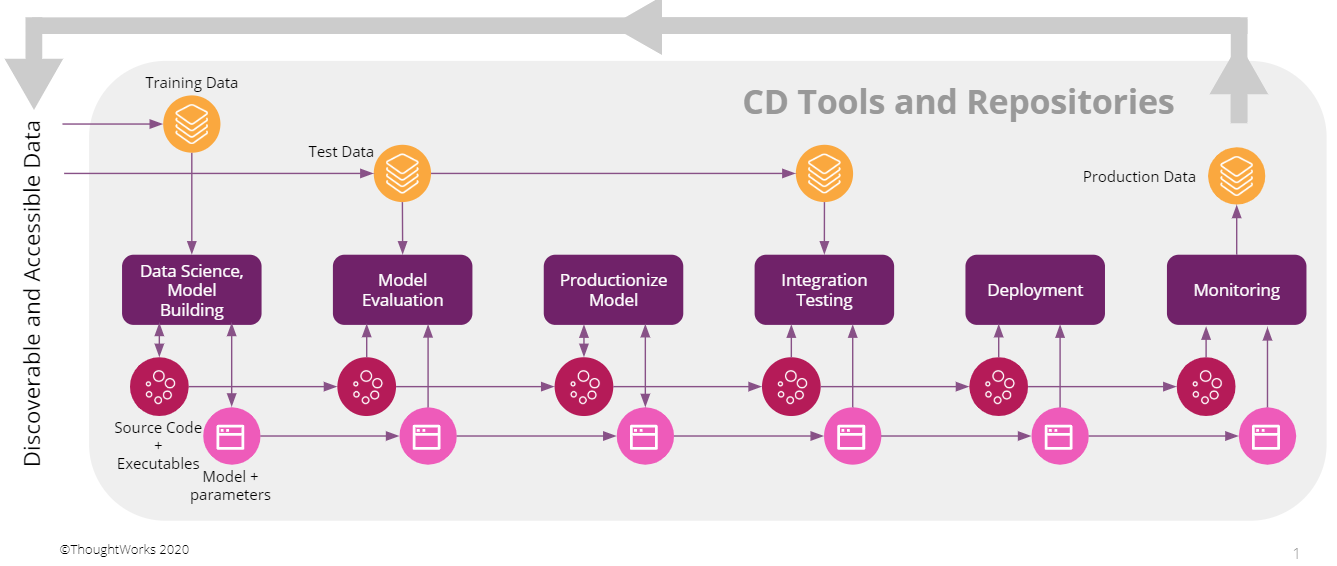

Example of the software that can be used:
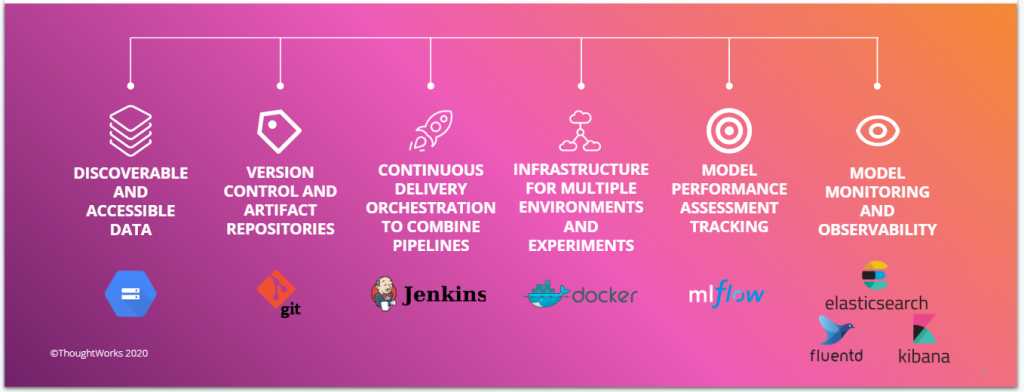



The final architecture can be divided into 3 parts: training loop, inference loop and monitoring loop.